In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# imporing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree


1) Create a Monte Carlo simulation to illustrate the problem.

In [27]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


n_obs = 100  # Number of observations
n_pred_list = np.arange(1, 101, 10)  # Increasing number of predictors from 1 to 100 in steps of 10
n_simulations = 100  # Number of simulations to run for each number of predictors



In [31]:
# Function to run Monte Carlo simulation
def run_simulation(n_obs, n_pred_list, n_simulations):
    r_squared_means = []

    for n_pred in n_pred_list:
        r_squared_values = []
        for _ in range(n_simulations):

            # Generate random predictors X and a random response Y
            X = np.random.randn(n_obs, n_pred)
            X = sm.add_constant(X)  # Add intercept
            beta = np.random.randn(n_pred + 1, 1)  # Random coefficients
            Y = X @ beta + np.random.randn(n_obs, 1)  # Generate Y with some noise

            # Fit linear regression model and calculate R-squared
            model = sm.OLS(Y, X).fit()
            r_squared_values.append(model.rsquared)

        # Calculate mean R-squared for this number of predictors
        r_squared_means.append(np.mean(r_squared_values))

    return r_squared_means



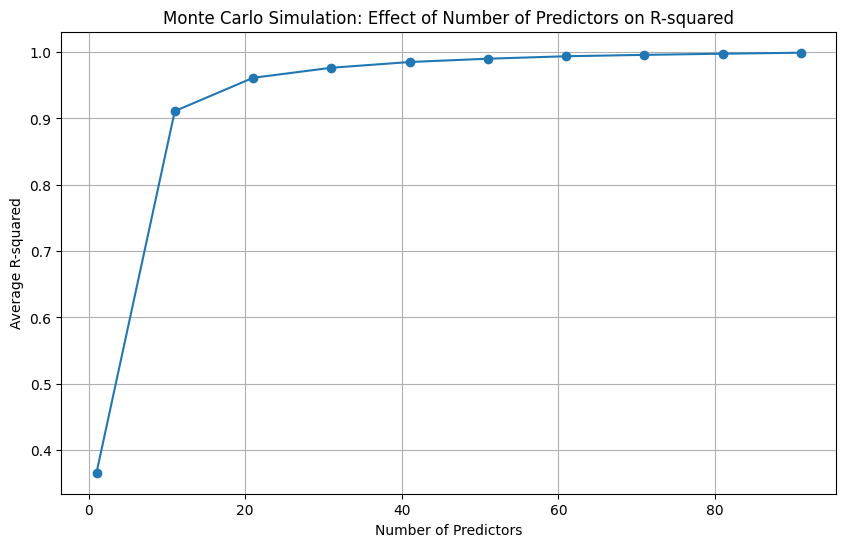

In [30]:

r_squared_means = run_simulation(n_obs, n_pred_list, n_simulations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_pred_list, r_squared_means, marker='o')
plt.xlabel('Number of Predictors')
plt.ylabel('Average R-squared')
plt.title('Monte Carlo Simulation: Effect of Number of Predictors on R-squared')
plt.grid(True)
plt.show()



4) Find a real dataset to illustrate the problem and your fix.


In [22]:
# Load the uploaded dataset
file_path_real_data = '/content/drive/MyDrive/Untitled folder/diabetes.csv'
df = pd.read_csv(file_path_real_data)

# Inspect the first few rows of the dataset and its shape
df.head(), df.shape

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 (768, 9))

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

df = pd.read_csv('/content/drive/MyDrive/Untitled folder/diabetes.csv')





In [23]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [24]:
# Create and fit the linear regression model
model = LinearRegression().fit(X_train, Y_train)



In [25]:
# Predict and calculate R-squared
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

print(f'R-squared: {r2:.4f}')

R-squared: 0.2550


In [26]:
# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations in the test set
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(f'Adjusted R-squared: {adjusted_r2:.4f}')

Adjusted R-squared: 0.2139
